This is my attempt to analyze accidental drugs related death in connecticut

you might come here from my post on linkedin, which contain the summary of this analysis. therefore, i give asterisk (*) symbol for anything i didn't put there, indicating it doesn't give any meaningful result for me

#Dataframe list



*   df: dataframe from raw data
*   df_baru: dataframe after preparation, the main dataframe in this analysis
*   df_injury: percentage of victims grouped by their kind of drug usage
*   df_sum: amount of victims who use specific drugs, grouped by kind of usage
*   df_sum_tot: amount of victims who use specific drugs
*   df_sum_known: amount of victims who use specific drugs, grouped by kind of usage, excluding UNKNOWN
*   df_abuse: amount of victims who abuse drugs
*   df_place: dataframe of victims whose location of death are known
*   df_num: dataframe contains numerical and binary features of df_baru
*   df_kpro: dataframe meant as input for Kprototype model
*   new_df: dataframe containing scaled numerical feature














#Preparation

##Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Load Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dibimbing/day 33/Accidental_Drug_Related_Deaths_2012-2021.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,Accident,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9200 non-null   float64
 3   Sex                            9194 non-null   object 
 4   Race                           9178 non-null   object 
 5   Ethnicity                      1287 non-null   object 
 6   Residence City                 8813 non-null   object 
 7   Residence County               8160 non-null   object 
 8   Residence State                7426 non-null   object 
 9   Injury City                    9024 non-null   object 
 10  Injury County                  5914 non-null   object 
 11  Injury State                   6290 non-null   object 
 12  Injury Place                   9100 non-null   o

In [ ]:
#check duplicate data
sum(df.duplicated())

0

#Data Preparation

##Extracting City from DeathCityGeo

In [ ]:
def fun(L):
  if len(L)==1:
    return ([np.nan,L[0]])
  else:
    return L

In [ ]:
df_baru=df[~df['DeathCityGeo'].isna()]
df_baru['B'] = df_baru['DeathCityGeo'].str.split('\n',1,expand=True,regex=False)[0]
df_baru['A'] = df_baru['B'].str.rsplit(',',1,expand=False)
df_baru['A']=df_baru['A'].apply(fun)
df_baru[['City','State']] = pd.DataFrame(df_baru.A.tolist(), index= df_baru.index)

##.

In [ ]:
#Missing Values Imputation
df_baru[['Heroin','Cocaine','Fentanyl','Fentanyl Analogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Meth/Amphetamine','Amphet','Tramad','Hydromorphone',
         'Morphine (Not Heroin)','Xylazine','Gabapentin',
         'Opiate NOS','Heroin/Morph/Codeine','Other Opioid','Any Opioid']]=df_baru[['Heroin','Cocaine','Fentanyl','Fentanyl Analogue','Oxycodone','Oxymorphone','Ethanol',
                                                                                    'Hydrocodone','Benzodiazepine','Methadone','Meth/Amphetamine','Amphet','Tramad','Hydromorphone',
                                                                                    'Morphine (Not Heroin)','Xylazine','Gabapentin','Opiate NOS','Heroin/Morph/Codeine',
                                                                                    'Other Opioid','Any Opioid']].fillna(0)


In [ ]:
#Dropping Insignificant Column
df_baru=df_baru.drop(columns=['Ethnicity','Ethanol','Residence City','Residence County','Residence State','Injury City','Injury County','Injury State','Death City','Death County','Death State','Location if Other',
                      'Cause of Death','Manner of Death','Other Significant Conditions ','Heroin death certificate (DC)','Other','ResidenceCityGeo','InjuryCityGeo','DeathCityGeo',
                      'B','A'])

In [ ]:
#Converting Drugs Columns into Binary
df_baru['Heroin']=df_baru['Heroin'].where(df_baru['Heroin']==0,1)
df_baru['Cocaine']=df_baru['Cocaine'].where(df_baru['Cocaine']==0,1)
df_baru['Fentanyl']=df_baru['Fentanyl'].where(df_baru['Fentanyl']==0,1)
df_baru['Fentanyl Analogue']=df_baru['Fentanyl Analogue'].where(df_baru['Fentanyl Analogue']==0,1)
df_baru['Oxycodone']=df_baru['Oxycodone'].where(df_baru['Oxycodone']==0,1)
df_baru['Oxymorphone']=df_baru['Oxymorphone'].where(df_baru['Oxymorphone']==0,1)
df_baru['Hydrocodone']=df_baru['Hydrocodone'].where(df_baru['Hydrocodone']==0,1)
df_baru['Benzodiazepine']=df_baru['Benzodiazepine'].where(df_baru['Benzodiazepine']==0,1)
df_baru['Methadone']=df_baru['Methadone'].where(df_baru['Methadone']==0,1)
df_baru['Meth/Amphetamine']=df_baru['Meth/Amphetamine'].where(df_baru['Meth/Amphetamine']==0,1)
df_baru['Amphet']=df_baru['Amphet'].where(df_baru['Amphet']==0,1)
df_baru['Tramad']=df_baru['Tramad'].where(df_baru['Tramad']==0,1)
df_baru['Hydromorphone']=df_baru['Hydromorphone'].where(df_baru['Hydromorphone']==0,1)
df_baru['Morphine (Not Heroin)']=df_baru['Morphine (Not Heroin)'].where(df_baru['Morphine (Not Heroin)']==0,1)
df_baru['Xylazine']=df_baru['Xylazine'].where(df_baru['Xylazine']==0,1)
df_baru['Gabapentin']=df_baru['Gabapentin'].where(df_baru['Gabapentin']==0,1)
df_baru['Opiate NOS']=df_baru['Opiate NOS'].where(df_baru['Opiate NOS']==0,1)
df_baru['Heroin/Morph/Codeine']=df_baru['Heroin/Morph/Codeine'].where(df_baru['Heroin/Morph/Codeine']==0,1)
df_baru['Other Opioid']=df_baru['Other Opioid'].where(df_baru['Other Opioid']==0,1)
df_baru['Any Opioid']=df_baru['Any Opioid'].where(df_baru['Any Opioid']==0,1)
df_baru=df_baru.drop(columns=['Any Opioid','Other Opioid'])

In [ ]:
#Checking All Unique State in the Data
df_baru['State']=df_baru['State'].where(df_baru['State']=='CT','CT')
df_baru['State'].unique()

array(['CT'], dtype=object)

In [ ]:
#Formulating New Feature: Drugs Sum
df_baru['Drugs Sum']=(df_baru['Heroin']+df_baru['Cocaine']+df_baru['Fentanyl']+df_baru['Fentanyl Analogue']+df_baru['Oxycodone']+df_baru['Oxymorphone']+df_baru['Hydrocodone']+
                      df_baru['Benzodiazepine']+df_baru['Methadone']+df_baru['Meth/Amphetamine']+df_baru['Amphet']+df_baru['Tramad']+df_baru['Hydromorphone']+df_baru['Morphine (Not Heroin)']+
                      df_baru['Xylazine']+df_baru['Gabapentin']+df_baru['Opiate NOS']+df_baru['Heroin/Morph/Codeine'])

In [ ]:
#Dropping People Whom Doesn't Used Relevant Drugs
df_baru=df_baru[df_baru['Drugs Sum']!=0]

In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9042 entries, 0 to 9201
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   9042 non-null   object 
 1   Date Type              9042 non-null   object 
 2   Age                    9041 non-null   float64
 3   Sex                    9034 non-null   object 
 4   Race                   9018 non-null   object 
 5   Injury Place           8946 non-null   object 
 6   Description of Injury  8273 non-null   object 
 7   Location               9023 non-null   object 
 8   Heroin                 9042 non-null   object 
 9   Cocaine                9042 non-null   object 
 10  Fentanyl               9042 non-null   object 
 11  Fentanyl Analogue      9042 non-null   object 
 12  Oxycodone              9042 non-null   object 
 13  Oxymorphone            9042 non-null   object 
 14  Hydrocodone            9042 non-null   object 
 15  Benz

##Classifying Description of Injury into 4 Categories

In [ ]:
df_baru['Description of Injury']=df_baru['Description of Injury'].str.upper()

In [ ]:
list_string=['ABUSE','COCAINE','OVERDOSE']
df_baru['is_abuse'] = df_baru['Description of Injury'].str.contains('|'.join(list_string))
df_baru['is_abuse'] = df_baru['is_abuse'].fillna(False)
df_baru['Description of Injury'] = np.where(df_baru['is_abuse'],"Abuse" ,df_baru['Description of Injury'])

In [ ]:
df_baru['Description of Injury']

0               Abuse
1            DRUG USE
2            DRUG USE
3                 NaN
4            DRUG USE
            ...      
9197            Abuse
9198    SUBSTANCE USE
9199            Abuse
9200            Abuse
9201            Abuse
Name: Description of Injury, Length: 9042, dtype: object

In [ ]:
df_baru[['Description of Injury','is_abuse']]

,Description of Injury,is_abuse
0,Abuse,True
1,DRUG USE,False
2,DRUG USE,False
3,NaN,False
4,DRUG USE,False
...,...,...
9197,Abuse,True
9198,SUBSTANCE USE,False
9199,Abuse,True
9200,Abuse,True


In [ ]:
df_baru['Description of Injury'].unique()

array(['Abuse', 'DRUG USE', nan, 'INGESTION', 'INHALATION', 'USED HEROIN',
       'INJECTION', 'SUBSTANCE USE', 'USED OXYCODONE', 'INGESTED DRUGS',
       'USED MULTIPLE MEDICATIONS, ALCOHOL', 'PRESCRIPTION  MISUSE',
       'INGESTED MEDICINES', 'USED FENTANYL',
       'ALCOHOL AND PRESCRIPTION FENTANYL OVERUSE',
       'TOOK PRESCRIPTION MEDICATIONS',
       'COMBINED MEDICATION AND SUBSTANCE INGESTION', 'TOOK MEDICATION',
       'USED MULTIPLE MEDICATIONS',
       'TOOK NON-PRESCRIPTION SYNTHETIC OPIOID',
       'ACUTE AND CHRONIC ALCOHOL/SUBSTANCE USE DISORDER',
       'USED ILLICIT DRUGS', 'MULTIPLE DRUG USE', 'TOOK DRUGS',
       'USAGE OF MULTIPLE DRUGS', 'TOOK MEDICATIONS',
       'COMBINED ALCOHOL AND MEDICATIONS',
       'INGESTED ETHANOL AND MEDICATIONS', 'INGESTION/INHALATION',
       'TOOK FENTANYL AND ETHANOL',
       'CONSUMED ETHANOL WITH PRESCRIPTION MEDICATIONS',
       'INGESTED PRESCRIPTION MEDICATION',
       'INGESTED MEDICATIONS AND ETHANOL', 'INGESTED MEDICATION'

In [ ]:
dicti={'USED COCAINE':'Abuse','DRUG USE':'Abuse','DRUG ABUSE':'Abuse','INGESTION':'Abuse','INHALATION':'Abuse','SUBSTANCE ABUSE':'Abuse','USED HEROIN':'Abuse','COCAINE USE':'Abuse',
       'INJECTION':'Abuse','SUBSTANCE USE':'Abuse','USED OXYCODONE':'Abuse','INGESTED DRUGS':'Abuse','USED MULTIPLE MEDICATIONS, ALCOHOL':'Complication','PRESCRIPTION MEDICINE ABUSE':'Abuse',
       'PRESCRIPTION  MISUSE':'Abuse','INGESTED MEDICINES':'Abuse','USED FENTANYL':'Abuse','USED HEROIN AND COCAINE':'Abuse','SUBSTANCE ABUSE.':'Abuse','ALCOHOL AND PRESCRIPTION FENTANYL OVERUSE':'Abuse',
       'TOOK PRESCRIPTION MEDICATIONS':'Accident','COMBINED MEDICATION AND SUBSTANCE INGESTION':'Abuse','TOOK MEDICATION':'Accident','USED MULTIPLE MEDICATIONS':'Accident',
       'TOOK NON-PRESCRIPTION SYNTHETIC OPIOID':'Abuse','ACUTE AND CHRONIC ALCOHOL/SUBSTANCE USE DISORDER':'Abuse','USED ILLICIT DRUGS':'Abuse','MULTIPLE DRUG USE':'Abuse','TOOK DRUGS':'Abuse',
       'USAGE OF MULTIPLE DRUGS':'Abuse','TOOK MEDICATIONS':'Accident','COMBINED ALCOHOL AND MEDICATIONS':'Complication','INGESTED ETHANOL AND MEDICATIONS':'Complication','INGESTION/INHALATION':'Abuse',
       'TOOK FENTANYL AND ETHANOL':'Complication','CONSUMED ETHANOL WITH PRESCRIPTION MEDICATIONS':'Complication','INGESTED PRESCRIPTION MEDICATION':'Accident','INGESTED MEDICATIONS AND ETHANOL':'Complication',
       'INGESTED MEDICATION':'Accident','TOOK MEDICATION WITH ALCOHOL':'Complication','USED PRESCRIPTION MEDICATIONS':'Accident','TOOK FENTANYL':'Abuse','ACUTE AND CHRONIC SUBSTANCE USE DISORDER':'Abuse',
       'INGESTED PILLS WITH ALCOHOL':'Complication',"TOOK ANOTHER PERSON'S MEDICATION":'Abuse','SUBSTANCE SUE':'Abuse','USED ILLICIT DRUGS AND ALCOHOL':'Abuse','USED MEDICATIONS AND ALCOHOL':'Complication',
       'INHALATION/INJECTION':'Abuse','USED ILLICIT AND PRESCRIPTION DRUGS':'Abuse','CONSUMED FENTANYL':'Abuse','TOOK PRESCRIBED MEDICATION':'Accident','INHALATION/INGESTION':'Abuse',
       'ACUTE HEROIN TOXICITY':'Abuse',"TOOK PRESCRIBED AND OTHER'S MEDICATIONS":"Abuse","SUBSTANCE AND MEDICATION USE":'Abuse','INGESTED MULTIPLE MEDICATIONS AND ALCOHOL':'Complication',
       'COMBINED ALCOHOL AND MEDICATION':'Complication','COMBINED ETHANOL AND OPIATE':'Complication','HEROIN USE':'Abuse','COMBINED MEDICATIONS WITH ALCOHOL':'Complication',
       'INGESTED ETHANOL AND A BENZODIAZEPINE':'Complication','TOOK PRESCRIPTION MEDICATION':'Accident','EXPOSED TO COLD WHILE INTOXICATED':'Accident','INGESTED MEDICATIONS':'Accident',
       'USED DRUGS AND INGESTED DRUG PACKETS':'Abuse','USED METHADONE':'Abuse','ACUTE AND CHRONIC SUBSTANCE USE':'Abuse','INGESTED MEDICATIONS AND ALCOHOL':'Complication','PRESCRIPTION DRUG USE':'Accident',
       'INJECTION AND INGESTION':'Abuse','INJECTION/SKIN ABSORPTION':'Abuse','TOOK PERSONAL METHADONE IN ADDITION TO INPATIENT MEDICAL PAIN THERAPY':'Abuse','USED HEROIN/OPIATES':'Abuse',
       'DERMAL ABSORPTION':'Accident','TOOK MULTIPLE MEDICATIONS':'Accident','ALCOHOL AND BENZODIAZEPINE USE':'Complication','INGESTION OF PILLS':'Abuse','INGESTED MULTIPLE MEDICATIONS':'Accident',
       'TOOK PRESCRIBED MEDICATIONS':'Accident','FENTANYL AND BENZODIAZEPINE USE':'Abuse','SUBSTANCE USE DISORDER':'Abuse','CONSUMED METHADONE AND ETHANOL':'Complication',
       'TOXIC EFFECTS OF ETHANOL AND FENTANYL':'Complication','OPIATE USE':'Abuse','USED OPIATES':'Abuse','USED FENTANYL AND ETHANOL':'Complication','MEDICATION AND ALCOHOL USE':'Complication',
       'ALCOHOL AND MEDICATION INGESTION':'Complication','INGESTION OF PRESCRIPTION MEDICATION':'Accident','OPIATE AND BUPRENORPHINE USE':'Abuse','INGESTED ALCOHOL AND MEDICATIONS':'Complication',
       'TOOK MEDICATIONS AND ALCOHOL':'Complication', 'FENTANYL USE':'Complication','CONSUMED PRESCRIPTION MEDICATION':'Accident','ALCOHOL INGESTION AND MEDICATION USE':'Complication',
       'USED METHADONE AND BENZODIAZAPINES':'Abuse', 'MISUSE OF MEDICATIONS':'Abuse','SUBMERGED IN BATHTUB WHILE INTOXICATED':'Abuse','USED MEDICATIONS AND ETHANOL':'Complication',
       'INGESTED OXYCODONE AND ALCOHOL':'Complication','USED MEDICATIONS':'Accident', 'MIXED ALCOHOL AND PILLS':'Complication', 'SUBSTANCE':'Abuse','DROWNED IN BATHTUB':'Accident',
       'TOOK PILLS AND ALCOHOL':'Complication','USED FENTANYL PATCHES':'Abuse','USED METHANONE AND ETHANOL':'Complication','DRANK ALCOHOL TO EXCESS WHILE ON PRESCRIPTION MEDICATIONS':'Complication',
       'TRANSDERMAL ABSORPTION':'Abuse', 'INGESTED ALCOHOL WITH MEDICATION':'Complication','INGESTED PRESCRIPTION MEDICATIONS':'Accident','TOOK MEDICATIONS WITH ALCOHOL':'Complication',
       'TOOK OPIATE':'Abuse','USED MORPHINE':'Abuse','USED METHAMPHETAMINE':'Abuse','INGESTED ALCOHOL WITH OPIOID MEDICATION PRESCRIBED TO ANOTHER':'Abuse','METHADONE USE':'Abuse',
       'INGESTED ETHANOL WITH MEDICATION':'Complication','INJECTED CRUSHED PILLS INTO PERIPHERALLY INSERTED CENTRAL CATHETER (PICC)':'Abuse','OPIATE AND BENZODIAZEPINE USE':'Abuse',
       'CONSUMED ILLICIT DRUG WITH ETHANOL':'Abuse', 'CONSUMED MEDICATIONS':'Accident','COLLAPSED WITH TRASH CAN AND PLASTIC BAG OVER FACE WHILE INTOXICATED.':'Accident',
       'INGESTED MEDICATION PRESCRIBED TO ANOTHER':'Abuse', 'USED DRUGS':'Abuse','CONSUMED ETHANOL WITH PRESCRIBED MEDICATIONS':'Complication','INGESTED PRESCRIPTION MEDICATION AND ALCOHOL':'Complication',
       'IMMERSION IN WATER WHILE INTOXICATED':'Accident','TOOK PRESCRIPTION-TYPE MEDICATIONS':'Accident','USED PRESCRIPTION AND OVER-THE-COUNTER MEDICATIONS':'Accident','INGESTED PRESCRIBED MEDICATIONS':'Accident',
       'TOOK PRESCRIPTION MEDICATIONS, SYNTHETIC OPIOID, AND ETHANOL':'Complication','INHALING 1,1-DIFLUOROETHANE':'Abuse', 'INGESTED MEDICATIONS, ALCOHOL':'Complication',
       'TOXIC EFFECTS OF ETHANOL AND PRESCRIPTION MEDICATIONS':'Complication','USED OXYMORPHONE':'Abuse','EXCESSIVE INGESTION OF PRESCRIBED MEDICATIONS AND ALCOHOL':'Abuse',
       'SUBMERGED IN WATER WHILE INTOXICATED':'Abuse', 'TOOK OPIOIDS':'Abuse','INGESTED NARCOTIC AND SEDATING MEDICATIONS WITH ALCOHOL':'Complication','USED MULTIPLE DRUGS':'Abuse',
       'TOOK OXYCODONE AND ALCOHOL':'Complication','CHEWED FENTANYL PATCHES, TOOK MEDICATIONS':'Abuse','USED DRUGS AND ALCOHOL':'Complication', 'MEDICATION MISUSE':'Abuse',
       'COMBINED ETHANOL WITH MEDICAMENTS':'Complication', 'OXYCODONE INGESTION':'Abuse','INGESTION OF MEDICATIONS':'Complication', 'PROLONGED EXPOSURE TO COLD':'Abuse','INHALATION; INGESTION':'Abuse',
       'USED MEDICATIONS WITH ALCOHOL':'Complication','TOOK ETHANOL AND FENTANYL':'Complication', 'INJECTION/INGESTION':'Abuse','TOOK ILLICIT DRUG WITH PRESCRIBED MEDICATIONS':'Abuse',
       'USED ETHANOL AND METHADONE':'Complication', 'USED METHADONE AND HYDROCODONE':'Abuse','TOOK ETHANOL WITH MEDICATIONS':'Complication', 'COMBINED MEDICATION ALCOHOL':'Complication',
       'PRESCRIPTION MEDICINE MISUSE':'Abuse', 'USED METHADONE AND AN OPIATE':'Abuse','USED HYDROCODONE SYRUP AND DIPHENHYDRAMINE':'Abuse','INGESTED NARCOTIC MEDICATIONS WITH ALCOHOL':'Complication',
       'SWALLOWED BAG OF DRUG WHILE IN POLICE CUSTODY':'Abuse','TOOK MEDICINE WITH ALCOHOL':'Abuse', 'USED OPIATES AND ETHANOL':'Complication','DRUGUSE':'Abuse','MISUSE OF FENTANYL PATCH':'Abuse',
       'TOOK ETHANOL, ILLICIT DRUG, AND PRESCRIPTION DRUGS':'Abuse','MEDICATION OVERUSE':'Abuse', 'INHALATION AND INGESTION':'Abuse', 'INGESTED PILLS':'Abuse','TRANSDERMAL':'Abuse',
       'USED HEROIN AND OPIATES':'Abuse','INGESTED MEDICINE WITH ALCOHOL':'Complication', 'PRESCRIPTION DRUG OVERUSE':'Abuse','OPIATE AND BENZODIAZAPINE':'Abuse','TOXIC EFFECTS OF FENTANYL':'Abuse',
       'INGESTED METHADONE PRESCRIBED TO ANOTHER':'Abuse', 'MISUSE OF MEDICATION':'Abuse','INTRADERMAL ABSOLUTION':'Abuse',"TOOK OTHER'S AND OWN PRESCRIBED MEDICATIONS":'Abuse',
       'EXCESSIVE USE OF MEDICATIONS':'Abuse','SKIN ABSORPTION':'Accident','EXCESSIVE USE OF PRESCRIBED MEDICATIONS':'Abuse','PRESCRIPTION MEDICATION':'Accident',
       'USED ALCOHOL AND PRESCRIPTION MEDICATIONS':'Complication', 'DRUG, ALCOHOL USE':'Complication','USED HEROIN AND BENZODIAZEPINES':'Abuse',
       'TOOK MEDICATIONS INCLUDING MEDICATIONS BELONGING TO ANOTHER':'Abuse','PRESCRIPTION MISUSE':'Abuse', 'ALCOHOL MEDICATIONS':'Complication','CONSUMED ETHANOL WITH PRESCRIBED MEDICATION':'Complication',
       'USED MEDICATIONS, ALCOHOL':'Complication', 'INJECTED FENTANYL':'Abuse','RESIDENCE':'UNKNOWN','INGESTED ALCOHOL, DIAZAPAM':'Complication', 'USED PRESCRIPTION DRUGS':'Accident',
       'TOOK PRESCRIPTION DRUGS':'Accident','TOOK ETHANOL AND PRESCRIPTION MEDICATIONS':'Complication', 'HEROIN INTOXICATION':'Abuse','COLLAPSED WHILE INTOXICATED AND COMPRESSED NECK WITH FENCE':'Accident',
       'ALCOHOL AND MEDICATION':'Complication', 'USED HEROIN AND ETHANOL':'Complication','INGESTED OPIOD':'Abuse', 'CONSUMED PRESCRIPTION MEDICATIONS AND ETHANOL':'Complication',
       'USED OXYCODONE IN COMBINATION WITH  OTHER MEDICATIONS':'Abuse','INGESTED PRESCRIPTION OPIOID PILLS WITH ALCOHOL':'Complication','COMBINED METHADONE AND BENZODIAZAPINE USE':'Abuse',
       'SUBMERGED IN BATHTUB WHILE UNDER THE INFLUENCE OF ILLICIT DRUGS':'Abuse','COMBINED MEDICATION WITH ALCOHOL':'Complication','INGESTED MEDICATIONS WITH ALCOHOL.':'Complication',
       'INJECTED PRESCRIPTION MEDICATIONS AND CRUSHED PILLS':'Abuse','USED OPIATES AND ALCOHOL':'Complication','USED OPIATES AND PCP':'Abuse','MEDICATIONS AND ALCOHOL':'Complication',
       'USED HYDROCODONE':'Abuse',"TOOK ANOTHER PERSON'S METHADONE":'Abuse','TOOK DRUGS AND INHALED AEROSOLIZED CHEMICALS':'Accident','INGESTED MULTIPLE PAIN MEDICATIONS':'Accident',
       'PRESCRIPTION MEDICATION MISUSE':'Abuse','SUBMERGED FACE IN WATER WHILE INTOXICATED':'Accident','INGESTED ALCOHOL COMBINED WITH MEDICATIONS':'Complication','FENTANYL TOXICITY':'Abuse',
       'INGESTED METHADONE PRESCRIBED TO ANOTHER PERSON WITH OWN PRESCRIPTION MEDICATIONS':'Abuse','TOOK ETHANOL AND PRESCRIBED MEDICATIONS':'Complication','EXCESSIVE INGESTION OF MEDICATIONS':'Abuse',
       'INGESTED MEDICATION AND ALCOHOL':'Complication', 'USED OXYCODONE AND ALCOHOL':'Complication','COMBINED MEDICATION AND ETHANOL TOXICITY':'Complication','MULTIPLE DRUG TOXICITY':'Abuse',
       'TOOK ALCOHOL AND PRESCRIPTION MEDICATIONS':'Complication','MISUSE OF PRESCRIPTION MEDICATIONS':'Abuse', 'MEDICATION, ALCOHOL USE':'Complication','INGESTION OF MEDICATIONS WITH ALCOHOL':'Complication',
       'CONSUMED OXYCODONE':'Abuse','INGESTION OF DRUGS':'Abuse', 'USED OPIOID(S)':'Abuse', 'TOOK AMPHETAMINE':'Abuse','TOOK OXYCODONE':'Abuse', 'TOOK DRUGS WHILE IN HOT TUB':'Accident',
       'INGESTED MEDICATIONS WITH ETHANOL':'Complication','USED MULTIPLE MEDICATIONS/SUBSTANCES':'Accident','USED PRESCRIPTION AND OVER-THE-COUNTER DRUGS':'Accident',
       'TOOK ALCOHOL AND MEDICATIONS':'Complication','INHALATION, INGESTION':'Abuse','USED FENTANYL AND ALCOHOL':'Complication', 'SKIN ABSORPTION/INHALATION':'Accident',
       'CONSUMED ETHANOL AND PRESCRIPTION MEDICATION':'Complication','BATHING IN HOT TUB WHILE INTOXICATED':'Accident', 'INJECTION/INHALATION':'Abuse',
       'USED SUBSTANCES INCLUDING MEDICATION PRESCRIBED TO ANOTHER':'Abuse','INGESTION OF PILLS AND ETHANOL':'Complication','TOOK DRUG':'Abuse','USED PRESCRIPTION MEDICATIONS AND ETHANOL':'Complication',
       'INGESTED NARCOTIC MEDICATIONS AND ALCOHOL':'Complication','CONSUMED PRESCRIBED MEDICATIONS AND OVER THE COUNTER MEDICATIONS':'Accident','MIXED ALCOHOL AND MEDICATIONS':'Complication',
       'MIXED ALCOHOL AND MEDICATION':'Complication','INGESTION OF HAND SANITIZER':'UNKNOWN','INGESTED ALCOHOL WITH PRESCRIPTION MEDICATIONS':'Complication','TOOK DRUGS AND ALCOHOL':'Complication'}
df_baru=df_baru.replace({"Description of Injury": dicti})

In [ ]:
#Imputing Missing Value
df_baru[['Description of Injury']]=df_baru[['Description of Injury']].fillna('UNKNOWN')

##*Classifying Injury Place into 4 Categories

In [ ]:
df_baru['Injury Place']=df_baru['Injury Place'].str.upper()

In [ ]:
df_baru['Injury Place'].unique()

array(['RESIDENCE', nan, 'IN VEHICLE', 'BUILDING', 'UNKNOWN', 'BACKYARD',
       'HOTEL OR MOTEL', 'OTHER', 'RESIDENTIAL BUILDING', 'RESTAURANT',
       'STREET', 'PENAL INSTITUTION', 'HOUSE', 'PARKING LOT', 'APARTMENT',
       'SHOPPING CENTER', 'BAR OR NIGHT CLUB', 'AUTOMOBILE',
       'APARTMENT HOUSE', 'SCHOOL, TRADE', 'OTHER, PUBLIC BUILDINGS',
       'UNIVERSITY OR COLLEGE', 'OTHER SPECIFIED PLACE', 'SHED',
       'OTHER, FARM OR RANCH', 'OTHER, RESIDENTIAL INSTITUTION', 'HOME',
       'HALFWAY HOUSE', 'OTHER, OTHER OUTDOOR AREA', 'VACANT LOT',
       'OTHER, INDUSTRIAL AREA', 'CASINO', 'PORCH', 'SIDEWALK',
       'HOSPITAL OR EMERGENCY ROOM', 'CHURCH', 'OTHER (UNKNOWN)',
       'UNSPECIFIED PLACE', 'NURSING HOME', 'DRIVEWAY', 'GARAGE',
       'FOREST, WOODED AREA', 'TRAIN OR SUBWAY STATION',
       'MOVIE HOUSE OR THEATRE', 'OFFICE BUILDING', 'ASSISTED LIVING',
       'YARD', 'STORE OR SHOPPING AREA', 'ROADWAY', 'STAIRS',
       'PUBLIC PARK', 'CONVENIENCE STORE', 'OTHER INDOOR 

In [ ]:
list_string=['RESIDENCE','RESIDENTIAL',' HOUSE','HOME']
df_baru['is_home'] = df_baru['Injury Place'].str.contains('|'.join(list_string))
df_baru['is_home'] = df_baru['is_home'].fillna(False)
df_baru['Injury Place'] = np.where(df_baru['is_home'],"Home",df_baru['Injury Place'])

In [ ]:
list_string=['STATION']
df_baru['is_public'] = df_baru['Injury Place'].str.contains('|'.join(list_string))
df_baru['is_public'] = df_baru['is_public'].fillna(False)
df_baru['Injury Place'] = np.where(df_baru['is_public'],"Public",df_baru['Injury Place'])

In [ ]:
dicti={'IN VEHICLE':'Home','BUILDING':'Home','BACKYARD':'Home','HOTEL OR MOTEL':'Public', 'OTHER':'UNKNOWN', 'RESTAURANT':'Public', 'STREET':'Public','PENAL INSTITUTION':'Rehab','HOUSE':'Home',
       'PARKING LOT':'Public', 'APARTMENT':'Home','SHOPPING CENTER':'Public', 'BAR OR NIGHT CLUB':'Public', 'AUTOMOBILE':'Home','SCHOOL, TRADE':'Public', 'OTHER, PUBLIC BUILDINGS':'Public',
       'UNIVERSITY OR COLLEGE':'Public', 'OTHER SPECIFIED PLACE':'Public', 'SHED':'Home','OTHER, FARM OR RANCH':'Home', 'OTHER, OTHER OUTDOOR AREA':'Public', 'VACANT LOT':'Public',
       'OTHER, INDUSTRIAL AREA':'Public','CASINO':'Public', 'PORCH':'Home', 'SIDEWALK':'Public','HOSPITAL OR EMERGENCY ROOM':'Rehab','CHURCH':'Public', 'OTHER (UNKNOWN)':'UNKNOWN',
       'UNSPECIFIED PLACE':'UNKNOWN','DRIVEWAY':'Public','GARAGE':'Home','FOREST, WOODED AREA':'Public','OFFICE BUILDING':'Public','ASSISTED LIVING':'Rehab','YARD':'Public','STORE OR SHOPPING AREA':'Public',
       'ROADWAY':'Public','STAIRS':'Home', 'PUBLIC PARK':'Public','CONVENIENCE STORE':'Public', 'OTHER INDOOR AREA':'Home','MULTIPLE LOCATIONS':'UNKNOWN','ALLEYWAY':'Public',
       'OTHER, HEALTH CARE FACILITY':'Rehab','FIELD':'Public','WAREHOUSE':'Home','OTHER, PARK OR RECREATIONAL AREA':'Public','GARAGE/WAREHOUSE':'Home','CAR IN HARTFORD':'Home',
       'RAILROAD TRACK':'Public','BOAT/MARINA':'Public','VACANT BUILDING':'Home', 'CAR':'Home','PUBLIC RECREATION AREA':'Public','RIVER, STREAM OR CANAL':'Public', 'CEMETERY':'Public',
       'LAKE OR POND':'Public','PUBLIC PARK, URBAN OR SUBURBAN':'Public','MOTEL':'Public', 'DETOXIFICATION CENTER':'Rehab','CAMPGROUNDS':'Public', 'SCHOOL, PRIMARY OR SECONDARY':'Public',
       'OTHER BUILDING':'Home','BEACH':'Public','STREET/HIGHWAY':'Public'}
df_baru=df_baru.replace({"Injury Place": dicti})

In [ ]:
df_baru

,Date,Date Type,Age,Sex,Race,Injury Place,Description of Injury,Location,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,City,State,Drugs Sum,is_abuse,is_home,is_public
0,05/29/2012,Date of death,37.0,Male,Black,Home,Abuse,Residence,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,CT,1,True,True,False
1,06/27/2012,Date of death,37.0,Male,White,Home,Abuse,Hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Norwich,CT,1,False,True,False
2,03/24/2014,Date of death,28.0,Male,White,Home,Abuse,Hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Marlborough,CT,1,False,True,False
3,12/31/2014,Date of death,26.0,Female,White,NaN,UNKNOWN,Residence,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baltic,CT,1,False,False,False
4,01/16/2016,Date of death,41.0,Male,White,Home,Abuse,Hospital,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bridgeport,CT,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,10/19/2021,Date of death,56.0,Male,Black or African American,Home,Abuse,Other,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Stamford,CT,2,True,False,False
9198,05/04/2021,Date of death,48.0,Male,Black or African American,Home,Abuse,Hospital - Inpatient,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New Haven,CT,1,False,True,False
9199,05/15/2021,Date of death,59.0,Male,White,Home,Abuse,Hospital - ER/Outpatient,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Hartford,CT,2,True,True,False
9200,05/28/2021,Date of death,68.0,Male,Black or African American,Home,Abuse,Residence,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hartford,CT,1,True,True,False


In [ ]:
#Imputing Missing Values
df_baru[['Injury Place']]=df_baru[['Injury Place']].fillna('UNKNOWN')

In [ ]:
df_baru['Injury Place'].unique()

array(['Home', 'UNKNOWN', 'Public', 'Rehab'], dtype=object)

##Categorizing Location of Death into 3 Categories

In [ ]:
df_baru['Location'].unique()

array(['Residence', 'Hospital', 'Other', 'Hospital - Inpatient',
       'Hospital - ER/Outpatient', 'Hospital - Dead On Arrival',
       'Convalescent Home', 'Nursing Home', nan, 'Assisted Living',
       'Shelter', 'Hospice', 'Other (Specify)', "Decedent's Home"],
      dtype=object)

In [ ]:
dicti={'Other':'Unknown', 'Hospital - Inpatient':'Hospital',
       'Hospital - ER/Outpatient':'Hospital', 'Hospital - Dead On Arrival':'Hospital',
       'Convalescent Home':'Residence', 'Nursing Home':'Hospital', 'Assisted Living':'Residence',
       'Shelter':'Residence', 'Hospice':'Hospital', 'Other (Specify)':'Unknown', "Decedent's Home":'Residence'}
df_baru[['Location']]=df_baru[['Location']].fillna('Unknown')
df_baru=df_baru.replace({"Location": dicti})

In [ ]:
df_place=df_baru[df_baru['Location']!='Unknown']

#Analysis

##Analysis of Victims Based on Kind of Usage

In [ ]:
df_injury=df_baru[df_baru['Description of Injury']!='UNKNOWN']

In [ ]:
df_injury=df_injury['Description of Injury'].value_counts(normalize=True)
df_injury = df_injury.mul(100)
df_injury = df_injury.rename('percent').reset_index()

In [ ]:
df_injury.rename(columns = {'index':'Cause of Death'}, inplace = True)

In [ ]:
df_injury

,Cause of Death,percent
0,Abuse,96.697314
1,Accident,1.826760
2,Complication,1.475925


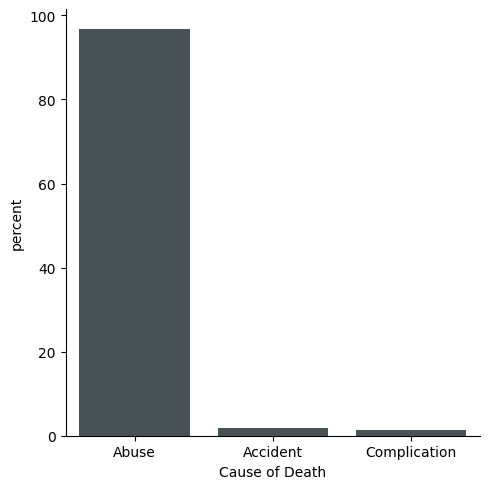

In [ ]:
g = sns.catplot(x='Cause of Death',y='percent',kind='bar',color='#465359',data=df_injury)

##Analysis of Victims Based on Drugs

In [ ]:
df_baru[['Heroin','Cocaine','Fentanyl','Fentanyl Analogue','Oxycodone','Oxymorphone','Hydrocodone','Benzodiazepine','Methadone','Meth/Amphetamine','Amphet','Tramad','Hydromorphone','Morphine (Not Heroin)',
         'Xylazine','Gabapentin','Opiate NOS','Heroin/Morph/Codeine','Drugs Sum']]=df_baru[['Heroin','Cocaine','Fentanyl','Fentanyl Analogue','Oxycodone','Oxymorphone','Hydrocodone','Benzodiazepine','Methadone',
                                                                                'Meth/Amphetamine','Amphet','Tramad','Hydromorphone','Morphine (Not Heroin)','Xylazine','Gabapentin','Opiate NOS',
                                                                                'Heroin/Morph/Codeine','Drugs Sum']].astype(int)

In [ ]:
df_sum=df_baru.groupby(['Description of Injury']).sum().drop(columns=['Age','is_abuse'])

In [ ]:
df_sum

,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Drugs Sum,is_home,is_public
Description of Injury,,,,,,,,,,,,,,,,,,,,,
Abuse,2885,2975,5421,723,670,129,114,1839,690,124,261,225,46,28,440,170,86,1488,18314,5898,18
Accident,8,2,17,0,67,9,10,86,29,1,1,11,8,5,0,11,1,9,275,135,0
Complication,7,2,19,1,34,2,10,71,19,2,1,5,2,4,0,1,1,10,191,97,0
UNKNOWN,447,192,214,4,106,8,21,242,76,0,22,17,0,12,1,0,31,445,1838,562,0


<Axes: >

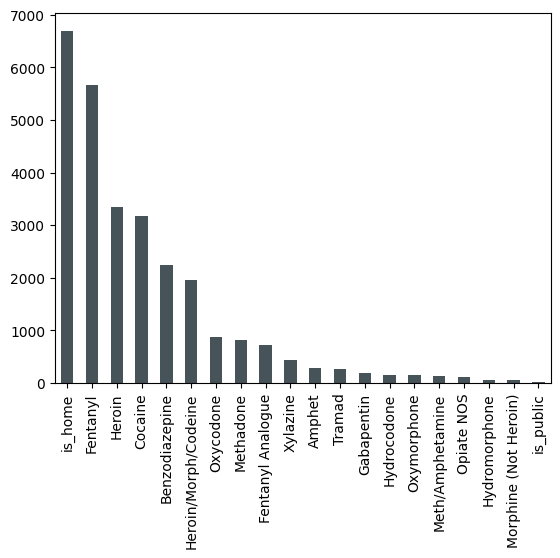

In [ ]:
df_sum_tot=df_sum.sum()
df_sum_tot=df_sum_tot.drop('Drugs Sum')
df_sum_tot.sort_values(ascending=False).plot(kind='bar',color='#465359')

In [ ]:
df_sum_known=df_sum.drop('UNKNOWN')

<Axes: >

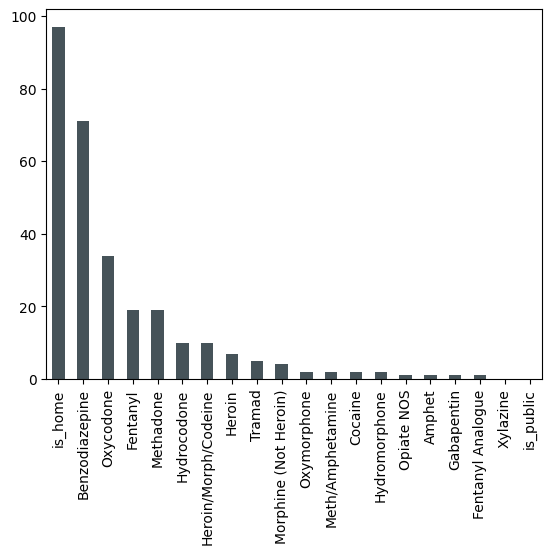

In [ ]:
#Analysis on Complication Victims
df_sum.loc[df_sum.index == 'Complication'].drop(columns='Drugs Sum').squeeze().sort_values(ascending=False).plot(kind='bar',color='#465359')

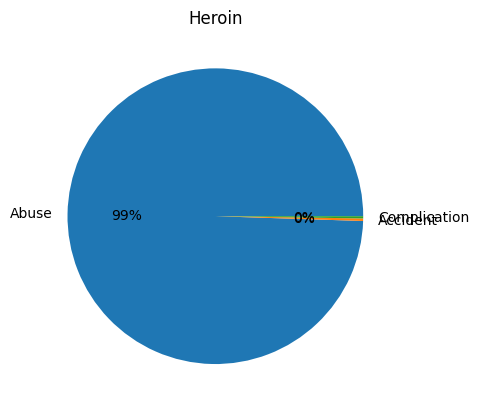

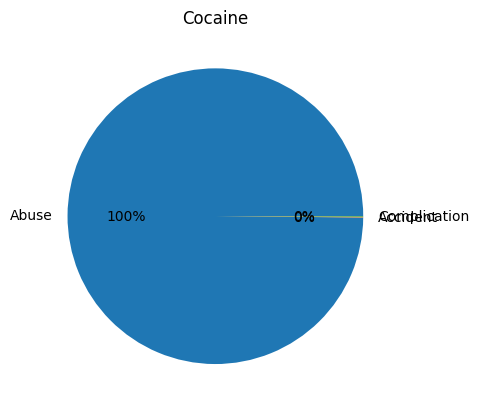

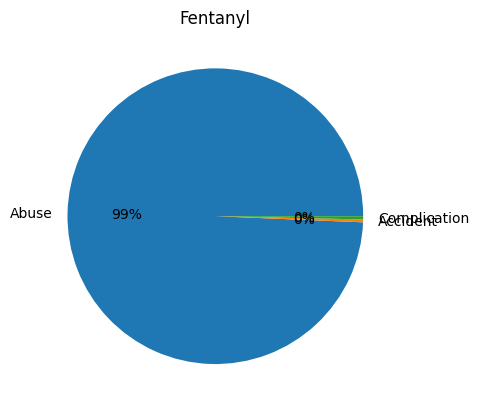

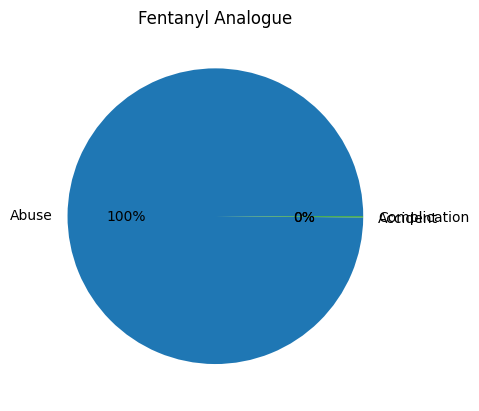

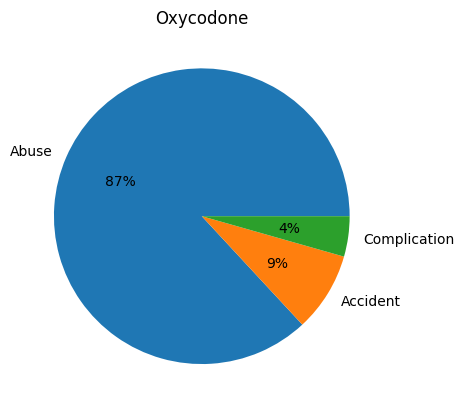

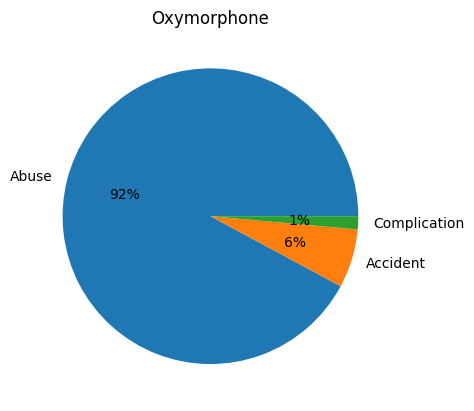

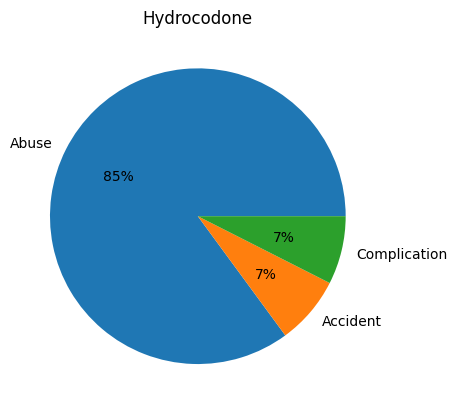

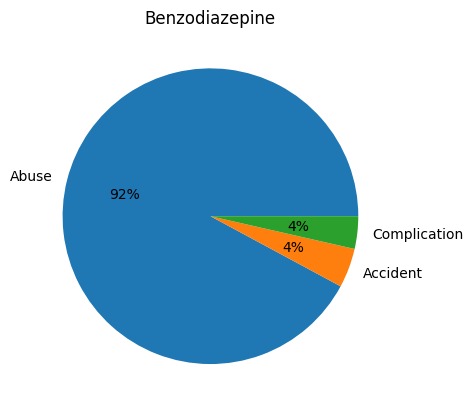

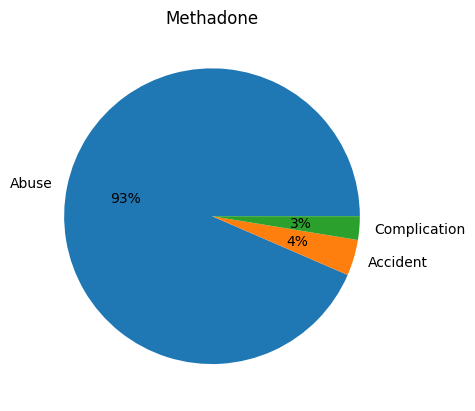

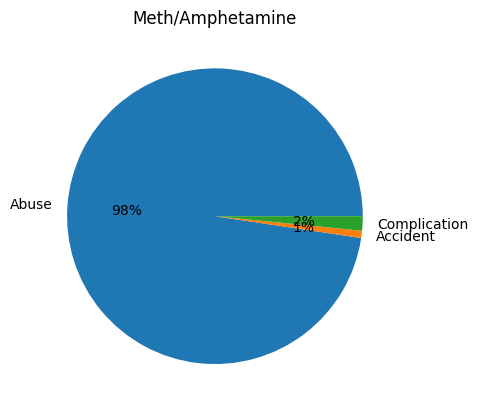

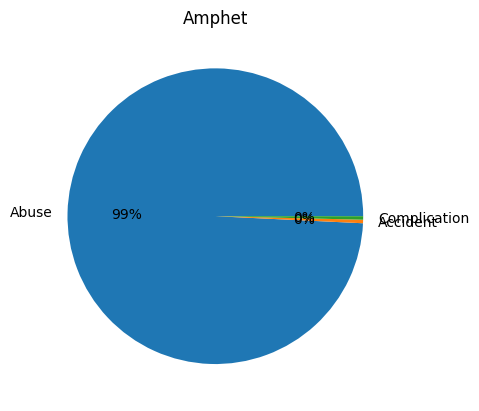

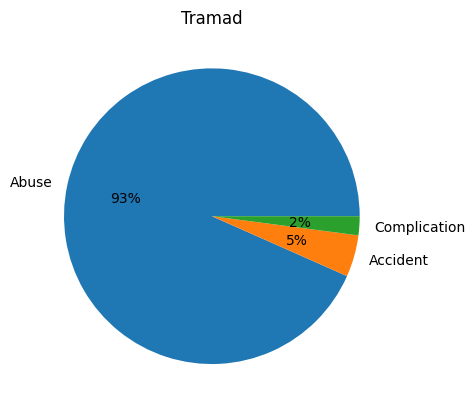

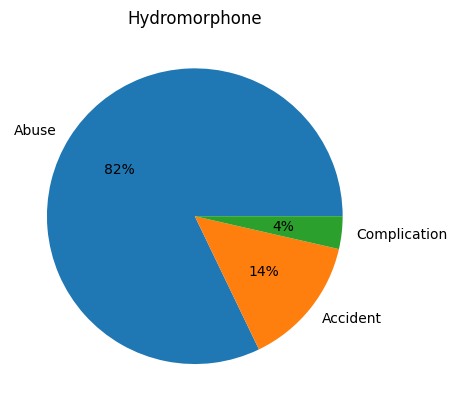

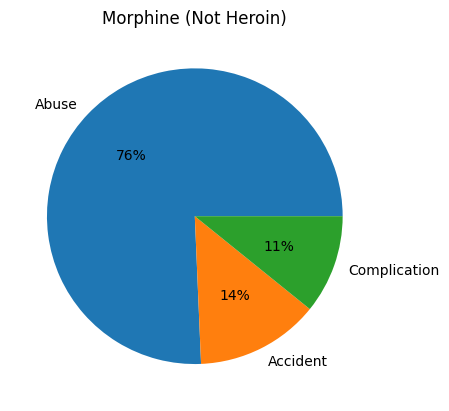

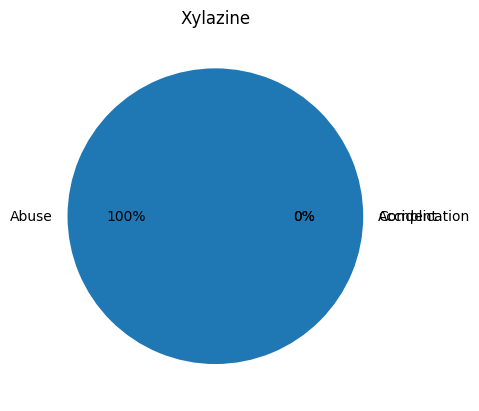

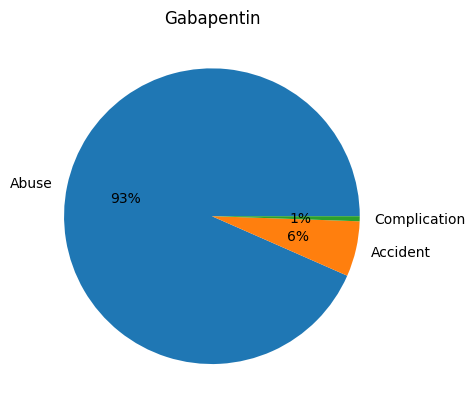

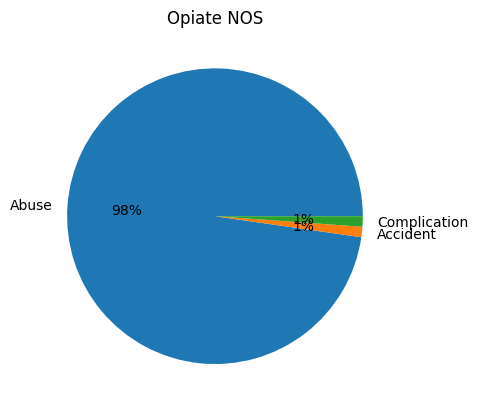

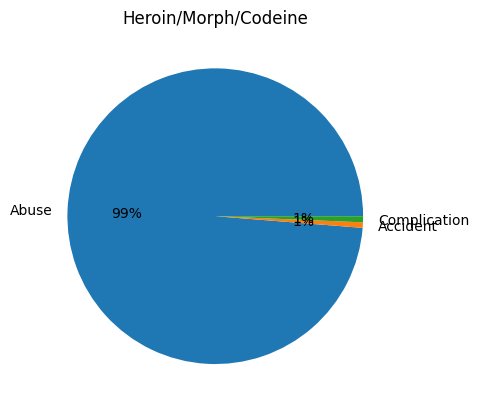

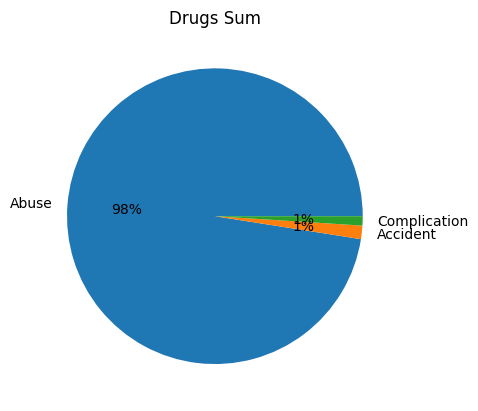

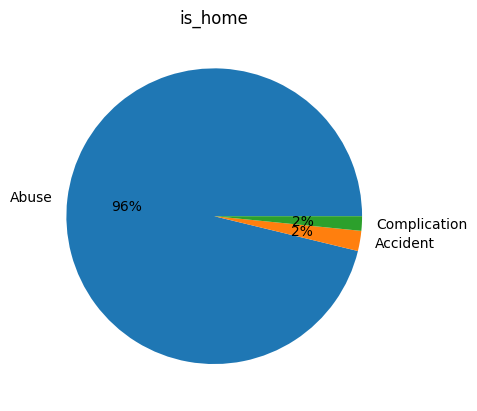

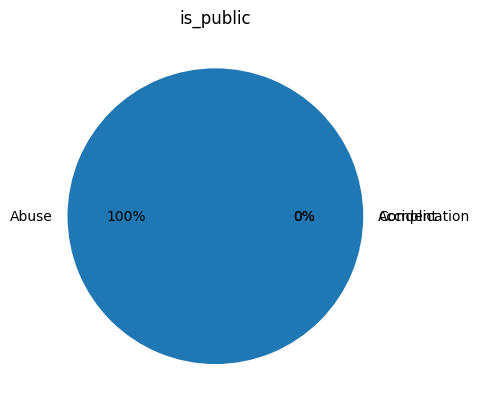

In [ ]:
#quick pie chart generator
list_label=['Abuse','Accident','Complication']
for i in df_sum_known.columns:
  plt.pie(df_sum_known[i],labels=list_label,autopct='%.0f%%')
  plt.title(i)
  plt.show()

##*Analyzing Victims Based on Ages

<Axes: xlabel='Age'>

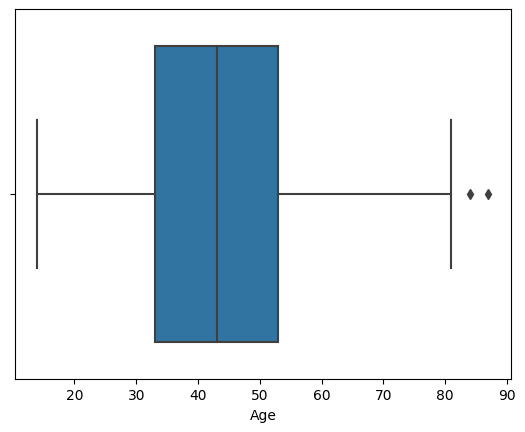

In [ ]:
sns.boxplot(x=df_baru["Age"])

In [ ]:
df_baru[df_baru['Age']<18]

,Date,Date Type,Age,Sex,Race,Injury Place,Description of Injury,Location,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,City,State,Drugs Sum,is_abuse,is_home,is_public
31,02/16/2014,Date of death,14.0,Female,White,UNKNOWN,Abuse,Hospital,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hartford,CT,2,False,False,False
1277,01/03/2020,Date of death,16.0,Male,White,Home,Abuse,Hospital,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Torrington,CT,2,True,True,False
1801,09/28/2018,Date of death,17.0,Female,White,Home,Abuse,Hospital,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Meriden,CT,4,False,True,False
2427,08/27/2012,Date of death,17.0,Female,White,Home,Abuse,Hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New Milford,CT,1,False,True,False
2623,08/26/2012,Date of death,17.0,Male,White,Home,Abuse,Residence,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,Enfield,CT,3,False,True,False
3032,06/07/2020,Date of death,17.0,Female,White,Home,Abuse,Residence,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fairfield,CT,1,True,True,False
4181,03/24/2014,Date of death,17.0,Male,White,Home,Abuse,Hospital,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Danbury,CT,2,False,True,False
4508,06/02/2017,Date reported,17.0,Male,White,Public,Abuse,Unknown,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,New Preston,CT,2,False,False,False
4885,04/06/2012,Date of death,16.0,Male,White,Home,Abuse,Residence,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Waterford,CT,1,False,True,False
5111,08/08/2021,Date of death,14.0,Female,White,Home,Abuse,Residence,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bristol,CT,1,True,True,False


In [ ]:
df_baru[df_baru['Age']>80]

,Date,Date Type,Age,Sex,Race,Injury Place,Description of Injury,Location,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,City,State,Drugs Sum,is_abuse,is_home,is_public
3495,05/04/2018,Date of death,84.0,Male,White,Home,Abuse,Hospital,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bridgeport,CT,3,False,True,False
5811,09/03/2020,Date of death,81.0,Male,Black,Home,Abuse,Residence,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New Haven,CT,2,True,True,False
8286,07/14/2013,Date of death,87.0,Male,White,Home,Accident,Residence,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,New Haven,CT,1,False,True,False


##Analyzing Abuse Based on Years

In [ ]:
df_baru['Date']=pd.to_datetime(df_baru['Date'])

In [ ]:
df_baru['year'] = df_baru['Date'].dt.year

In [ ]:
df_abuse=df_baru[df_baru['Description of Injury']=='Abuse']

In [ ]:
df_abuse=df_abuse[df_abuse['Date Type']=='Date of death']

<Axes: xlabel='year'>

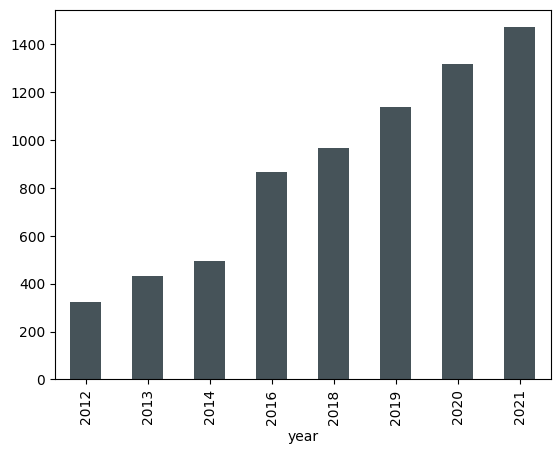

In [ ]:
df_abuse.groupby(by=["year"]).count()['Date'].plot(kind='bar',color='#465359')

In [ ]:
df_abuse_count=df_abuse.groupby(by=["year"]).count()['Date'].to_frame().reset_index()

In [ ]:
df_abuse_count

,year,Date
0,2012,322
1,2013,432
2,2014,496
3,2016,865
4,2018,969
5,2019,1140
6,2020,1320
7,2021,1471


In [ ]:
df_abuse_count.loc[len(df_abuse_count.index)] = [2015,0]
df_abuse_count.loc[len(df_abuse_count.index)] = [2017,0]

In [ ]:
df_abuse_count

,year,Date
0,2012,322
1,2013,432
2,2014,496
3,2016,865
4,2018,969
5,2019,1140
6,2020,1320
7,2021,1471
8,2015,0
9,2017,0


<Axes: xlabel='year'>

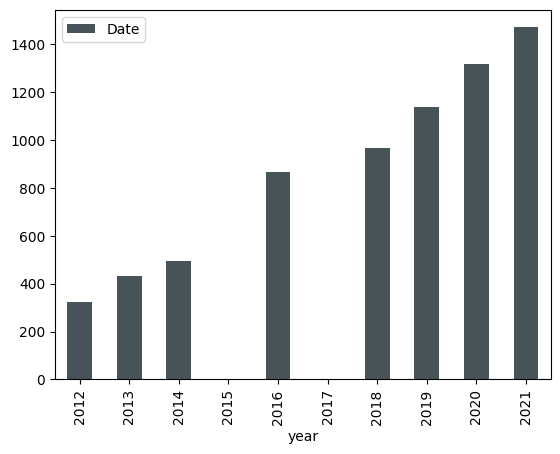

In [ ]:
df_abuse_count.sort_values(by=['year']).plot(x='year',y='Date',kind='bar',color='#465359')

##Analyzing Victims Based on Drugs Sum

In [ ]:
df_baru.groupby(by=["Description of Injury"]).mean()['Drugs Sum']

Description of Injury
Abuse           2.291255
Accident        1.821192
Complication    1.565574
UNKNOWN         2.368557
Name: Drugs Sum, dtype: float64

<Axes: xlabel='Drugs Sum', ylabel='Description of Injury'>

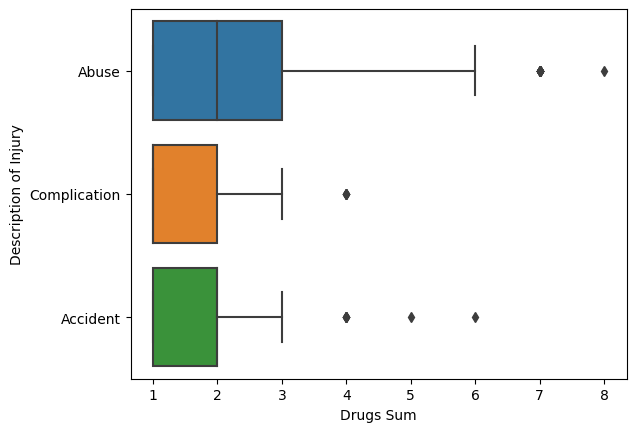

In [ ]:
sns.boxplot(data=df_baru[df_baru['Description of Injury']!='UNKNOWN'],y='Description of Injury',x='Drugs Sum')

##Analyzing Victims Based on Location of Death

<Axes: xlabel='Location'>

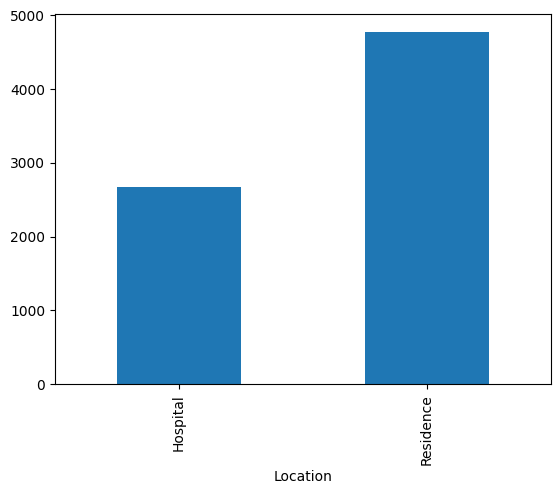

In [ ]:
df_place.groupby(by=["Location"]).count()['Date'].plot(kind='bar')

<Axes: ylabel='Date'>

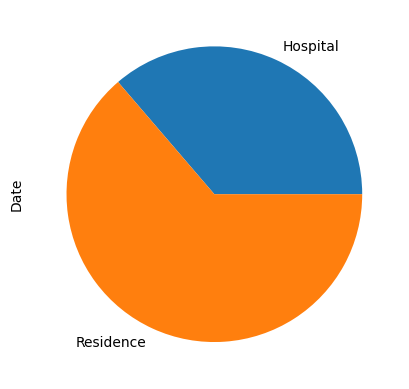

In [ ]:
df_place2=df_place[df_place['Description of Injury']=='Abuse']
df_place2.groupby(by=["Location"]).count()['Date'].plot(kind='pie')

<Axes: ylabel='Date'>

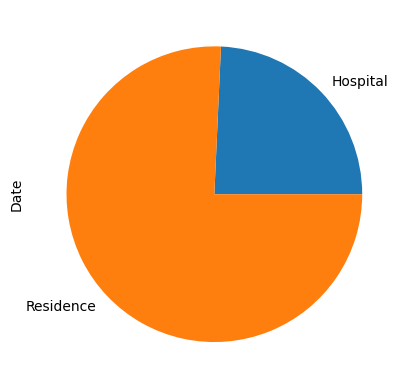

In [ ]:
df_place2=df_place[df_place['Description of Injury']=='Accident']
df_place2.groupby(by=["Location"]).count()['Date'].plot(kind='pie')

<Axes: ylabel='Date'>

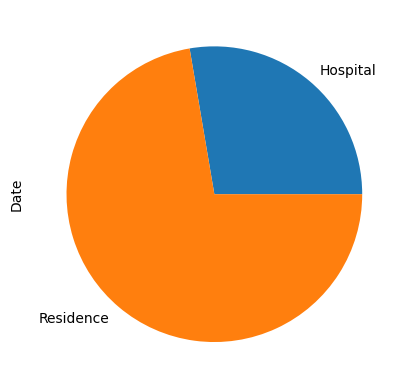

In [ ]:
df_place2=df_place[df_place['Description of Injury']=='Complication']
df_place2.groupby(by=["Location"]).count()['Date'].plot(kind='pie')

#*Modelling

##Kmeans Clustering (Victim Clustering)

###Processing Data to Match Model Input

In [ ]:
dicti={'Male':1,'Female':0}
df_baru=df_baru.replace({"Sex": dicti})

In [ ]:
a=[0,1]
df_num=df_baru[df_baru['Sex'].isin(a)]

In [ ]:
df_num=df_baru.drop(columns=['Date','Date Type','Race','Injury Place','Description of Injury','Location','City','State','is_abuse','is_home','is_public','year'])

In [ ]:
df_num=df_num.dropna()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9034 entries, 0 to 9201
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9034 non-null   float64
 1   Sex                    9034 non-null   float64
 2   Heroin                 9034 non-null   int64  
 3   Cocaine                9034 non-null   int64  
 4   Fentanyl               9034 non-null   int64  
 5   Fentanyl Analogue      9034 non-null   int64  
 6   Oxycodone              9034 non-null   int64  
 7   Oxymorphone            9034 non-null   int64  
 8   Hydrocodone            9034 non-null   int64  
 9   Benzodiazepine         9034 non-null   int64  
 10  Methadone              9034 non-null   int64  
 11  Meth/Amphetamine       9034 non-null   int64  
 12  Amphet                 9034 non-null   int64  
 13  Tramad                 9034 non-null   int64  
 14  Hydromorphone          9034 non-null   int64  
 15  Morp

In [ ]:
features=['Age','Drugs Sum']
X = df_num[features].values


X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = features)
new_df.describe()


,Age,Drugs Sum
count,9.034000e+03,9.034000e+03
mean,-1.384276e-16,6.134861e-17
std,1.000055e+00,1.000055e+00
min,-2.322023e+00,-1.092676e+00
25%,-8.018640e-01,-1.092676e+00
50%,-1.780129e-03,-2.392058e-01
75%,7.983038e-01,6.142639e-01
max,3.518589e+00,4.881613e+00


In [ ]:
df_num['Age']=new_df['Age']
df_num['Drugs Sum']=new_df['Drugs Sum']
df_num=df_num.dropna()

###Elbow Method and Clustering

<Axes: >

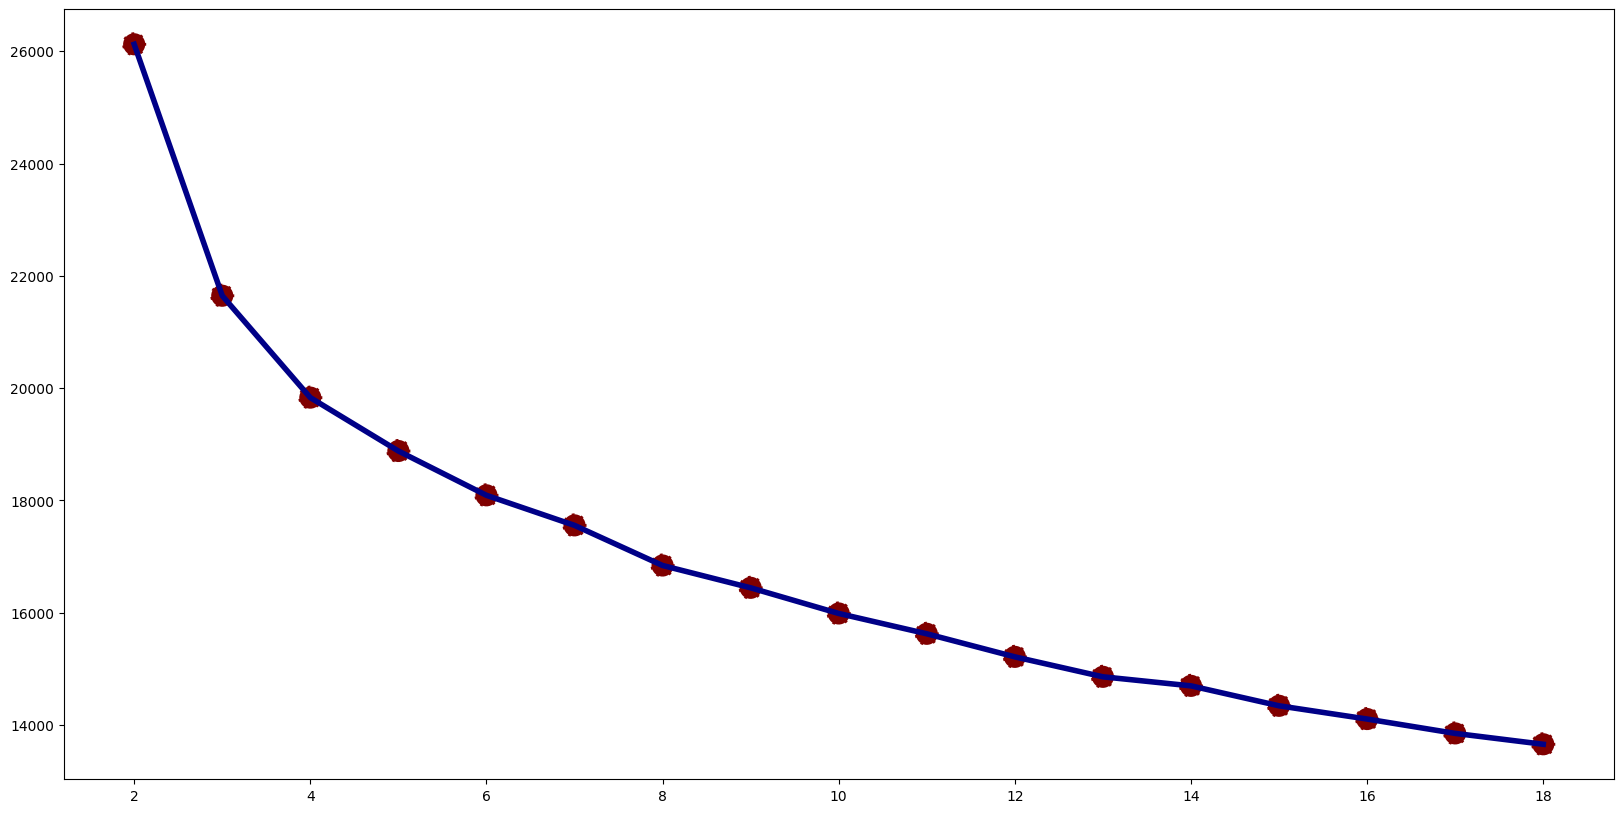

In [ ]:
inertia = []

for i in range(2, 19):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_num.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 19), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 19), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_num.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_num['cluster'] = kmeans.labels_

In [ ]:
df_num.groupby(['cluster']).mean()

,Age,Sex,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Drugs Sum
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.896171,0.730230,0.380102,0.350128,0.623087,0.084821,0.102679,0.015944,0.021046,0.249362,0.095026,0.010842,0.038903,0.029337,0.008291,0.007015,0.052296,0.019133,0.012117,0.220026,1.095429
1,-0.784095,0.746530,0.377791,0.347616,0.654798,0.085094,0.099578,0.017502,0.018105,0.262523,0.084490,0.017502,0.028365,0.028968,0.009053,0.002414,0.051298,0.010863,0.015691,0.226916,1.131909
2,-0.890081,0.761311,0.375846,0.344140,0.631279,0.074457,0.092269,0.013894,0.017813,0.232633,0.091557,0.011756,0.029925,0.025294,0.004988,0.005700,0.048450,0.016031,0.010688,0.214108,-0.630823
3,0.836210,0.740936,0.371700,0.352341,0.624076,0.082013,0.095389,0.019007,0.013376,0.250264,0.086237,0.016895,0.029567,0.031679,0.004224,0.005984,0.043295,0.021119,0.014784,0.215769,-0.639354


##Kprototype Clustering (Victim Clustering)

###Data Preparation

In [ ]:
df_kpro=df_baru.drop(columns=['Date','Date Type','is_abuse','is_home','is_public','State','year'])

In [ ]:
features=['Age','Drugs Sum']
X = df_kpro[features].values

X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = features)
new_df.describe()

,Age,Drugs Sum
count,8.855000e+03,8.855000e+03
mean,3.530647e-17,3.642986e-16
std,1.000056e+00,1.000056e+00
min,-2.320208e+00,-1.092209e+00
25%,-8.008112e-01,-1.092209e+00
50%,-1.128857e-03,-2.383632e-01
75%,7.985535e-01,6.154824e-01
max,3.517473e+00,4.884710e+00


In [ ]:
df_kpro['Age']=new_df['Age']
df_kpro['Drugs Sum']=new_df['Drugs Sum']
df_kpro=df_kpro.dropna()

###Elbow Method and Clustering

<Axes: >

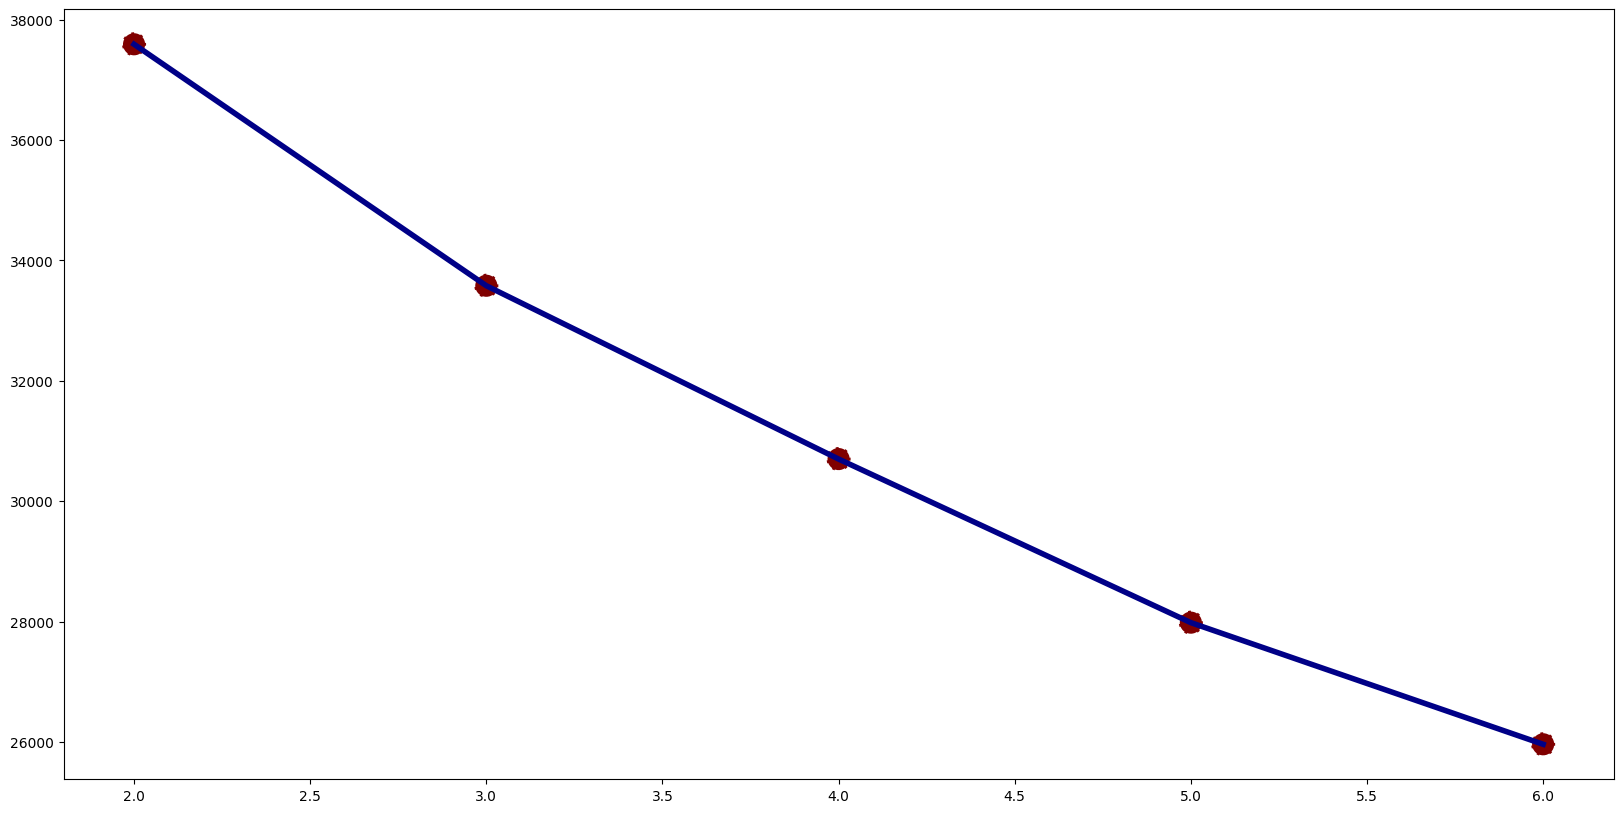

In [ ]:
categorical_features_idx = [2,3,4,5,24]
mark_array=df_kpro.values
inertia = []

for i in range(2, 7):
    kproto = KPrototypes(n_clusters=i, max_iter=20,random_state=0,n_init=5).fit(mark_array, categorical=categorical_features_idx)
    inertia.append(kproto.cost_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 7), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 7), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20,random_state=0).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1922, ncost: 35670.60770054049
Run: 1, iteration: 2/20, moves: 1401, ncost: 34604.9212834618
Run: 1, iteration: 3/20, moves: 402, ncost: 34466.719146424046
Run: 1, iteration: 4/20, moves: 272, ncost: 34376.92213529582
Run: 1, iteration: 5/20, moves: 286, ncost: 34271.73443854695
Run: 1, iteration: 6/20, moves: 266, ncost: 34186.4087756414
Run: 1, iteration: 7/20, moves: 190, ncost: 34149.25680599369
Run: 1, iteration: 8/20, moves: 126, ncost: 34135.96895464385
Run: 1, iteration: 9/20, moves: 32, ncost: 34134.942376596606
Run: 1, iteration: 10/20, moves: 16, ncost: 34134.67055522053
Run: 1, iteration: 11/20, moves: 4, ncost: 34134.64652612676
Run: 1, iteration: 12/20, moves: 4, ncost: 34134.5423456523
Run: 1, iteration: 13/20, moves: 10, ncost: 34134.17977328814
Run: 1, iteration: 14/20, moves: 3, ncos

In [ ]:
#Assign Cluster to Data
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df_kpro['cluster'] = list(clusters)

In [ ]:
#Check if there's any Significant Characteristic in the cluster
df_kpro.groupby(['cluster']).mean()

,Age,Sex,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Drugs Sum
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.005136,0.678015,0.521329,0.125513,0.170221,0.019278,0.221903,0.043888,0.038966,0.374077,0.158737,0.009844,0.034865,0.036916,0.011895,0.015587,0.006153,0.001231,0.032404,0.027071,-0.008616
1,-0.015824,0.770680,0.519471,0.683635,0.712140,0.102571,0.039450,0.004581,0.007381,0.183507,0.062611,0.017562,0.024434,0.022398,0.004327,0.000764,0.046577,0.014762,0.004836,0.466276,-0.006484
2,0.024294,0.784170,0.000000,0.000000,1.000000,0.110294,0.060986,0.008218,0.009948,0.220156,0.055363,0.014706,0.037197,0.029844,0.003460,0.002163,0.091263,0.028547,0.006055,0.007353,0.023478


In [ ]:
#Check if there's any Significant Characteristic in the cluster
df_kpro.groupby(['cluster']).agg(pd.Series.mode)

,Age,Sex,Race,Injury Place,Description of Injury,Location,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,City,Drugs Sum
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.640875,1.0,White,Home,Abuse,Residence,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New Haven,-0.238363
1,-0.800811,1.0,White,Home,Abuse,Residence,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hartford,-0.238363
2,0.878522,1.0,White,Home,Abuse,Residence,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hartford,-0.238363


##Kmeans Clustering (Drugs Clustering)

In [ ]:
df_num1=df_num.drop(columns=['Age','Sex','Drugs Sum','cluster'])

<Axes: >

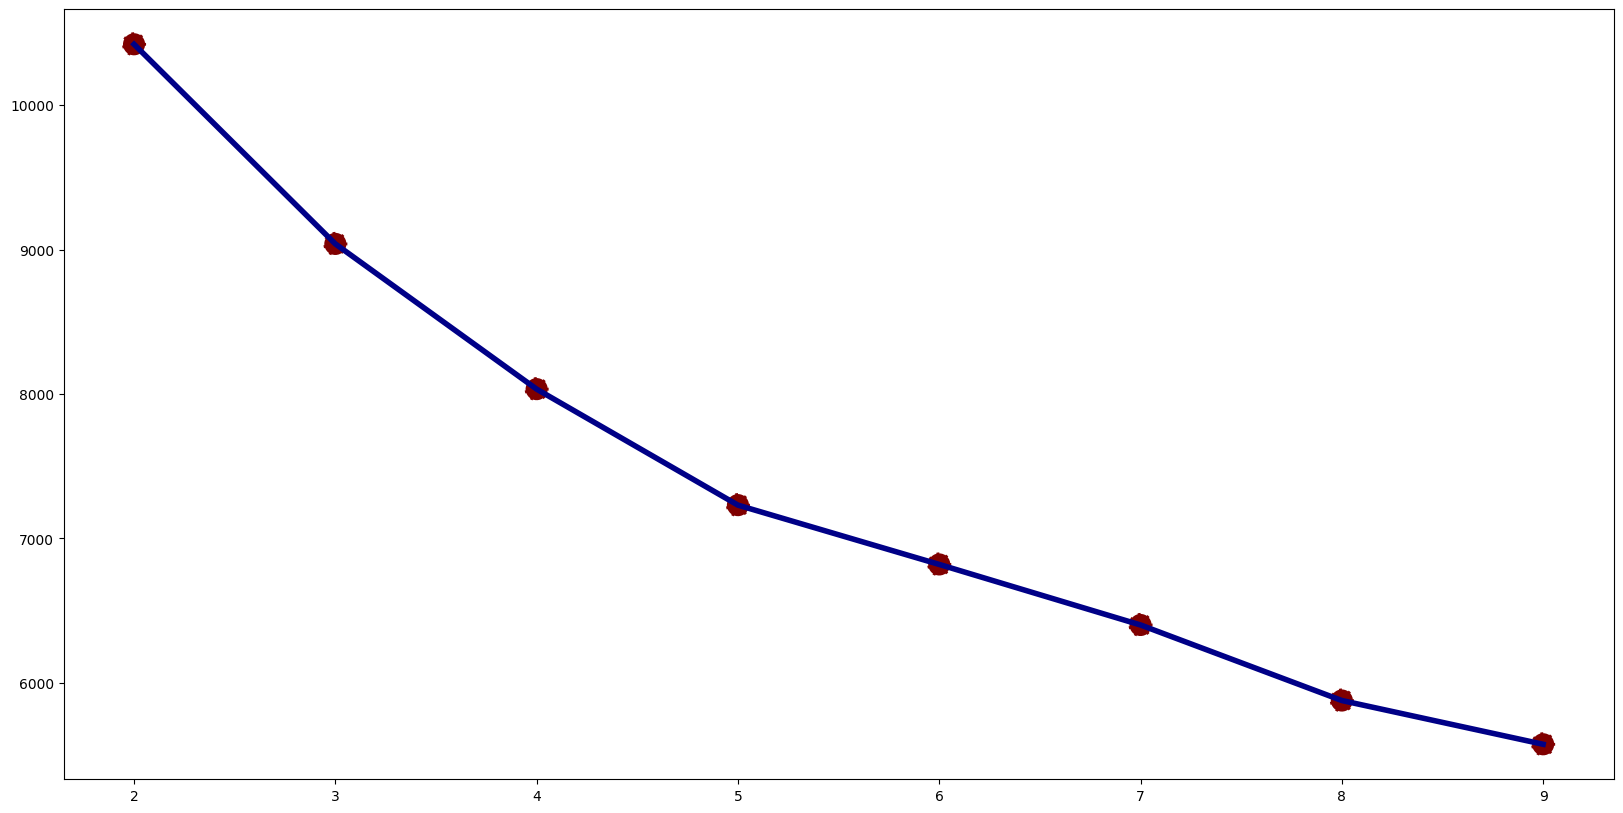

In [ ]:
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_num1.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_num1.values)

KMeans(n_clusters=5, random_state=0)

In [ ]:
df_num1['cluster'] = kmeans.labels_

In [ ]:
df_num1.groupby(['cluster']).mean()

,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine
cluster,,,,,,,,,,,,,,,,,,
0,0.000000,0.339524,0.0,0.002902,0.289611,0.061521,0.049913,0.399304,0.218224,0.015670,0.035403,0.040627,0.011027,0.024376,0.000580,0.009286,0.058619,0.044689
1,0.145705,0.000000,1.0,0.110185,0.063429,0.007611,0.009061,0.234143,0.061254,0.012323,0.038782,0.030083,0.005074,0.001812,0.084451,0.025734,0.005074,0.006162
2,1.000000,0.334764,1.0,0.189700,0.042060,0.010300,0.005150,0.242918,0.082403,0.033476,0.017167,0.018026,0.009442,0.000858,0.019742,0.009442,0.000000,1.000000
3,1.000000,0.281270,0.0,0.000000,0.044718,0.003889,0.014906,0.195075,0.046014,0.003240,0.014906,0.017498,0.005185,0.000000,0.000000,0.002592,0.000000,0.436163
4,0.132501,1.000000,1.0,0.110517,0.038027,0.001188,0.006536,0.161616,0.046940,0.013072,0.038622,0.032086,0.001188,0.000000,0.100416,0.030303,0.001188,0.001783


## Kmeans Clustering (Demographic Clustering)

<Axes: >

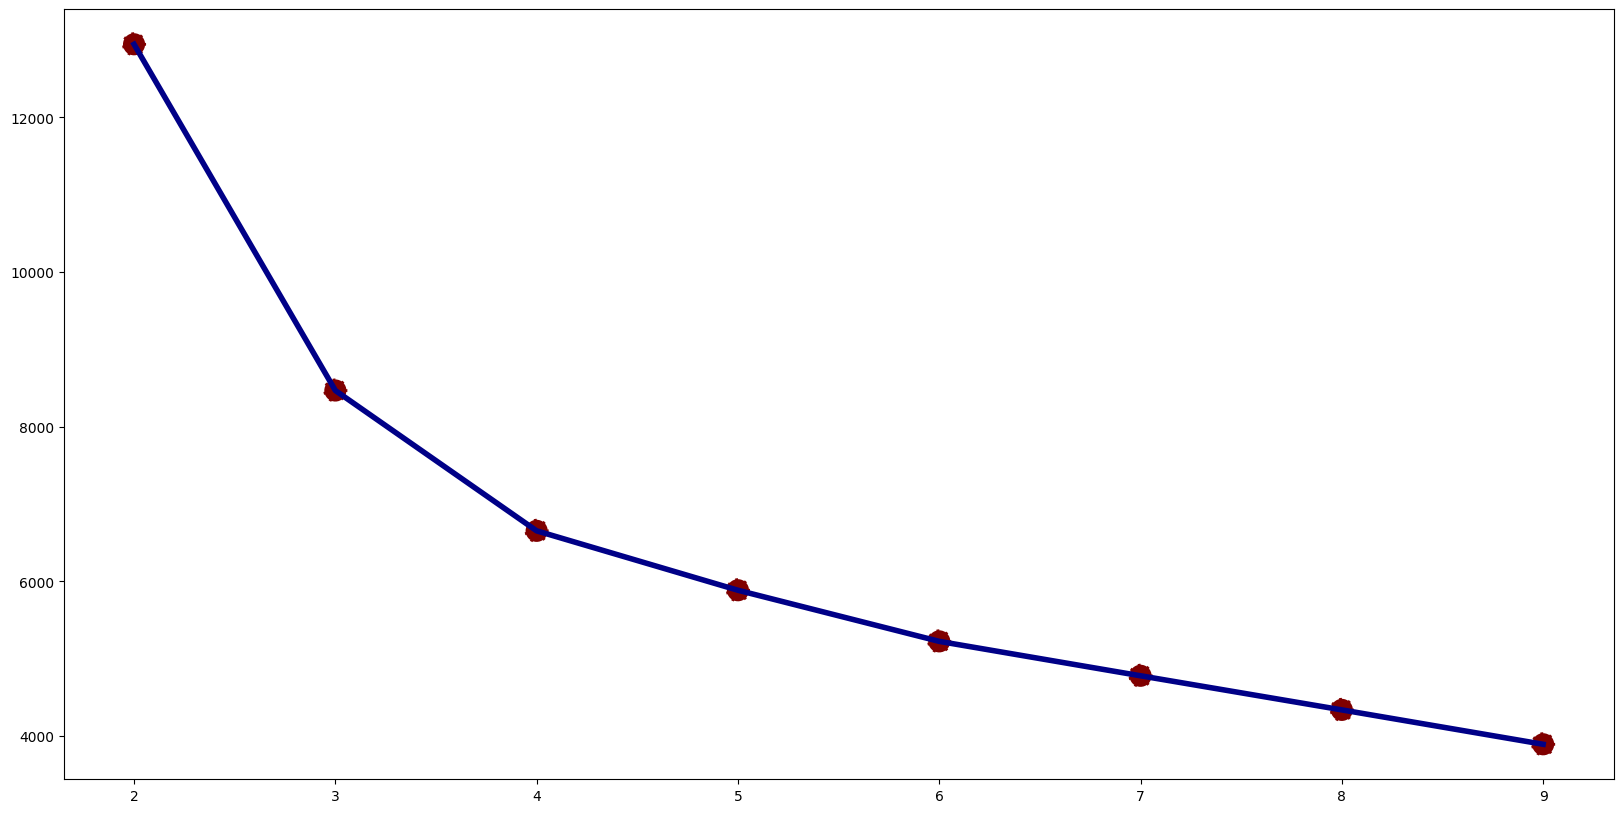

In [ ]:
df_num2=df_num.drop(columns=df_num1.columns)
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_num2.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_num2.values)
df_num2['cluster'] = kmeans.labels_
df_num2.groupby(['cluster']).mean()

,Age,Sex,Drugs Sum
cluster,,,
0,-0.890081,0.761311,-0.630823
1,0.898263,0.729540,1.092294
2,-0.782018,0.747140,1.134773
3,0.836210,0.740936,-0.639354


## KPrototype Clustering (Demographic Clustering)

In [ ]:
df_kpro1=df_baru.drop(columns=['Date','Date Type','is_abuse','is_home','is_public','State','year'])
df_num1=df_num1.drop(columns='cluster')
df_kpro1=df_kpro1.drop(columns=df_num1.columns)
df_kpro1=df_kpro1.dropna()

<Axes: >

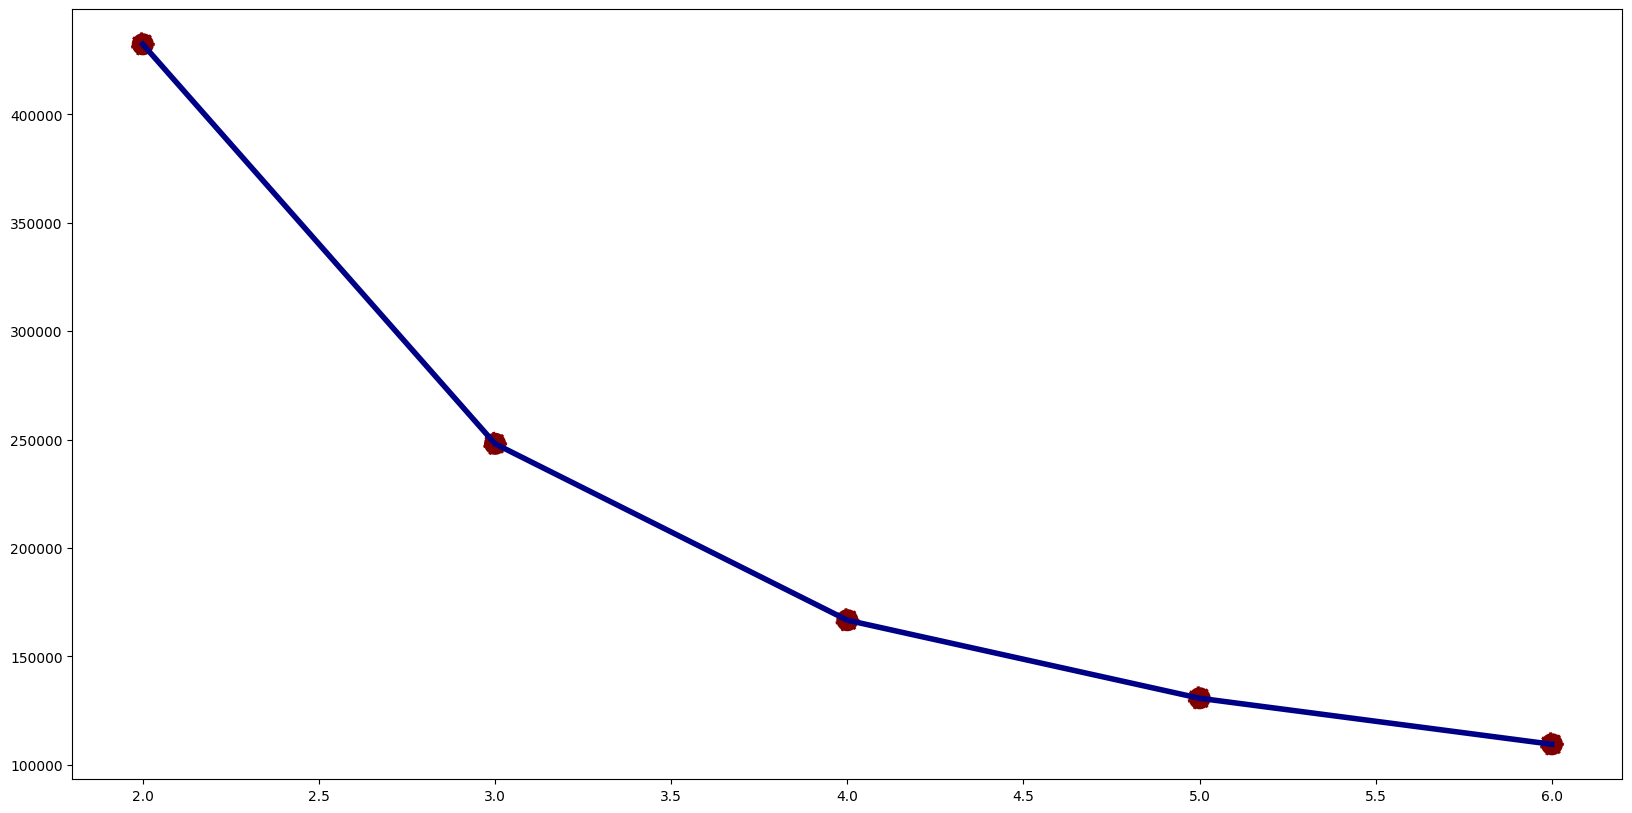

In [ ]:
categorical_features_idx = [2,3,4,5,6]
mark_array=df_kpro1.values
inertia = []

for i in range(2, 7):
    kproto = KPrototypes(n_clusters=i, max_iter=20,random_state=0).fit(mark_array, categorical=categorical_features_idx)
    inertia.append(kproto.cost_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 7), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 7), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20,random_state=0).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1123, ncost: 276532.6568506751
Run: 1, iteration: 2/20, moves: 740, ncost: 261583.79310465613
Run: 1, iteration: 3/20, moves: 574, ncost: 253112.54295517493
Run: 1, iteration: 4/20, moves: 303, ncost: 250591.97893325778
Run: 1, iteration: 5/20, moves: 234, ncost: 248781.2606020068
Run: 1, iteration: 6/20, moves: 70, ncost: 248619.02484699755
Run: 1, iteration: 7/20, moves: 0, ncost: 248619.02484699755
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1857, ncost: 326209.94373208936
Run: 2, iteration: 2/20, moves: 1309, ncost: 279145.5473062274
Run: 2, iteration: 3/20, moves: 779, ncost: 263215.0087312317
Run: 2, iteration: 4/20, moves: 618, ncost: 253566.65134922374
Run: 2, iteration: 5/20, moves: 323, ncost: 250750.07302284378
Run: 2, iter

In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df_kpro1['cluster'] = list(clusters)
df_kpro1.groupby(['cluster']).mean()

,Age,Sex,Drugs Sum
cluster,,,
0,57.059278,0.735503,2.279317
1,28.656088,0.751638,2.230424
2,42.347754,0.747088,2.331115


In [ ]:
df_kpro1.groupby(['cluster']).agg(pd.Series.mode)

,Age,Sex,Race,Injury Place,Description of Injury,Location,City,Drugs Sum
cluster,,,,,,,,
0,54.0,1.0,White,Home,Abuse,Residence,Hartford,2
1,33.0,1.0,White,Home,Abuse,Residence,Hartford,2
2,36.0,1.0,White,Home,Abuse,Residence,Hartford,2
